<a href="https://colab.research.google.com/github/Flock1/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

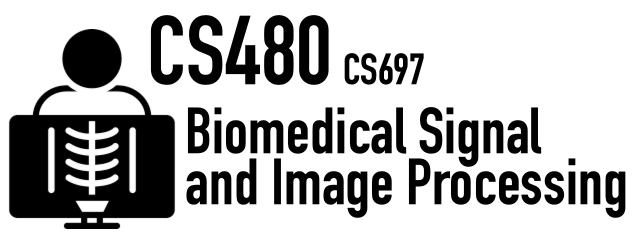
# Assignment 1


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [39]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [40]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

Text(0, 0.5, 'Amplitude')

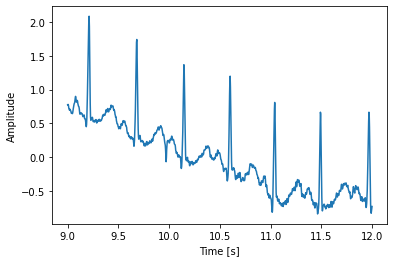

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

from9to11 = ecg[8*SAMPLING_RATE:11*SAMPLING_RATE]
# plt.plot(from9to11)
time_steps = np.linspace(9,12, len(from9to11))
plt.figure()
plt.plot(time_steps, from9to11)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline


In [4]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 7.7 MB/s 


In [10]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:12]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880 2065 2251]


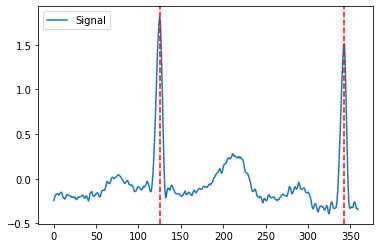

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

{'ECG_R_Peaks': array([ 116,  285,  452,  616,  774,  936, 1108]), 'sampling_rate': 360}


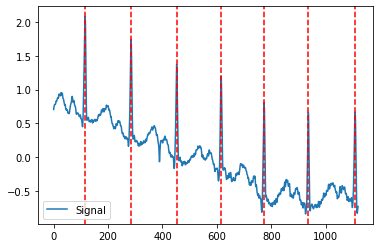

In [12]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1
_, rpeaks = nk.ecg_peaks(ecg[8*SAMPLING_RATE-40:11*SAMPLING_RATE+1], sampling_rate=SAMPLING_RATE)
print(rpeaks)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg[8*SAMPLING_RATE-40:11*SAMPLING_RATE])

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [ ]:
'''
Since the normal heart rate is 60-100 beats per minute, this is not normal since we have 2 beats a second which is 120 beats a minute. So the heart rate is not 
normal
'''

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [22]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

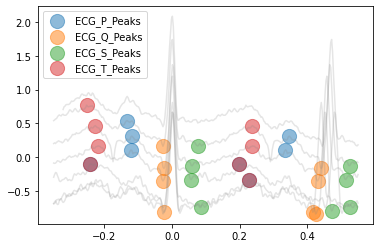

In [23]:
# _, waves_peak = nk.ecg_delineate(ecg[8*SAMPLING_RATE-40:11*SAMPLING_RATE], rpeaks, sampling_rate=SAMPLING_RATE, method="peak")
# plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
#                        waves_peak['ECG_P_Peaks'],
#                        waves_peak['ECG_Q_Peaks'],
#                        waves_peak['ECG_S_Peaks']], ecg[8*SAMPLING_RATE-40:11*SAMPLING_RATE])

_, waves_peak = nk.ecg_delineate(ecg[8*SAMPLING_RATE-40:11*SAMPLING_RATE], rpeaks, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')


In [ ]:
# TODO Does the detection work well?
'''
The detections seems to work well. Since this is not a normal hear rate, the P Q S T detections aren't exactly like the normal heart neat detections. 
'''

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

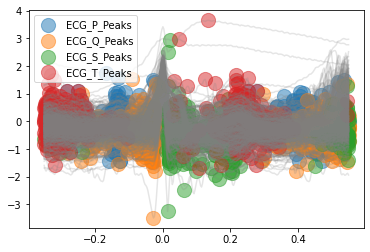

In [24]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

[0.00000000e+00 3.33333333e-03 6.66666667e-03 ... 1.79993333e+02
 1.79996667e+02 1.80000000e+02]
(54001,)


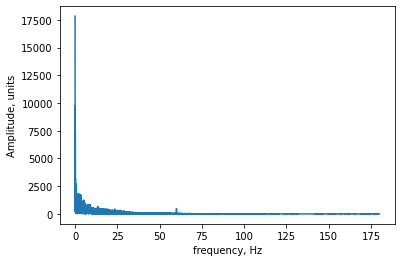

In [31]:
fft_spectrum = np.fft.rfft(ecg)
fft_spectrum_pow = fft_spectrum**2
freq = np.fft.rfftfreq(ecg.size, d=1./SAMPLING_RATE)
print(freq)
print(fft_spectrum.shape)
fft_spectrum_abs = np.abs(fft_spectrum)
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

In [25]:
# fs = 10000
# t = np.arange(0, 1, step = 1. / fs)

# frequency1 = 10
# frequency2 = 200
# s_t = np.sin(2 * np.pi * frequency1 * t) + np.sin(2 * np.pi * frequency2 * t)
# freq = np.fft.rfftfreq(s_t.size, d=1./fs)
# print(freq)


# N = len(s_t)//2 + 1
# print(N, s_t.size)
# n = np.arange(N)
# T = N/fs
# freq2 = n/T 
# print(freq2)

# n = s_t.size
# d = 1./fs
# val = 1.0 / (n * d)
# print(val)
# N = n//2 + 1
# print(N)
# result = np.arange(0, N, dtype=int)
# print(result)
# # results[:N] = p1
# # p2 = np.arange(-(n//2), 0, dtype=int)
# # print(p2)
# # results[N:] = p2
# print(result*val)

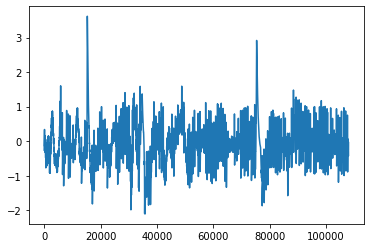

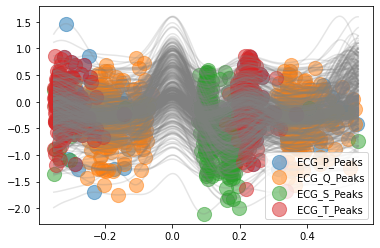

In [43]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

ecg_new = nk.signal_filter(ecg, sampling_rate=SAMPLING_RATE, lowcut=None, highcut=5)
plt.plot(ecg_new)
_, rpeaks = nk.ecg_peaks(ecg_new, sampling_rate=SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(ecg_new, rpeaks, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

In [37]:
# TODO Does the filtering improve the result?
'''
My results differ from the one you mentioned in class. You suggested to use vakues between 10 and 1000 but I get this error:
ValueError: Digital filter critical frequencies must be 0 < Wn < 1

which probably means that the frequency doesn't exist. So I used the frequency that I got from FFT plot. And I get a good result from None to 3-5 Hz. 
'''

'\nMy results differ from the one you mentioned in class. You suggested to use vakues between 10 and 1000 but I get this error:\n'

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#